# Libraries

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import pprint

# Get json file from website

From https://docs.awesomeapi.com.br/api-de-moedas

In [2]:
currencies = requests.get('https://economia.awesomeapi.com.br/json/all')
currencies_dic = currencies.json()
print(currencies_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.8074', 'low': '4.8071', 'varBid': '0.0006', 'pctChange': '0.01', 'bid': '4.8069', 'ask': '4.8074', 'timestamp': '1689627602', 'create_date': '2023-07-17 18:00:02'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '4.835', 'low': '4.835', 'varBid': '0', 'pctChange': '0', 'bid': '4.69', 'ask': '4.98', 'timestamp': '1689619980', 'create_date': '2023-07-17 15:53:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.6451', 'low': '3.6256', 'varBid': '0.0008', 'pctChange': '0.02', 'bid': '3.6415', 'ask': '3.6469', 'timestamp': '1689643880', 'create_date': '2023-07-17 22:31:20'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.2946', 'low': '6.2578', 'varBid': '0.0053', 'pctChange': '0.08', 'bid': '6.2927', 'ask': '6.2966', 'timestamp': '1689643870', 'creat

In [3]:
print('Moeda: {}\nValor: {}'.format(currencies_dic['USD']['code'], currencies_dic['USD']['bid']))

Moeda: USD
Valor: 4.8069


# Exploring last 180 days

In [4]:
days = '/180'
currency = '/USD-BRL'
currencies_days = requests.get('https://economia.awesomeapi.com.br/json/daily/'+currency+days)
currencies_dic_days = currencies_days.json()
print(currencies_dic_days[:2])

[{'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.7896', 'low': '4.7896', 'varBid': '0', 'pctChange': '0', 'bid': '4.7889', 'ask': '4.7903', 'timestamp': '1689534395', 'create_date': '2023-07-16 16:06:35'}, {'high': '4.8148', 'low': '4.776', 'varBid': '0.0002', 'pctChange': '0', 'bid': '4.7889', 'ask': '4.7903', 'timestamp': '1689534395'}]


In [5]:
last_days_list = [float(item['bid']) for item in currencies_dic_days]
last_days_list.reverse()

# Plot data

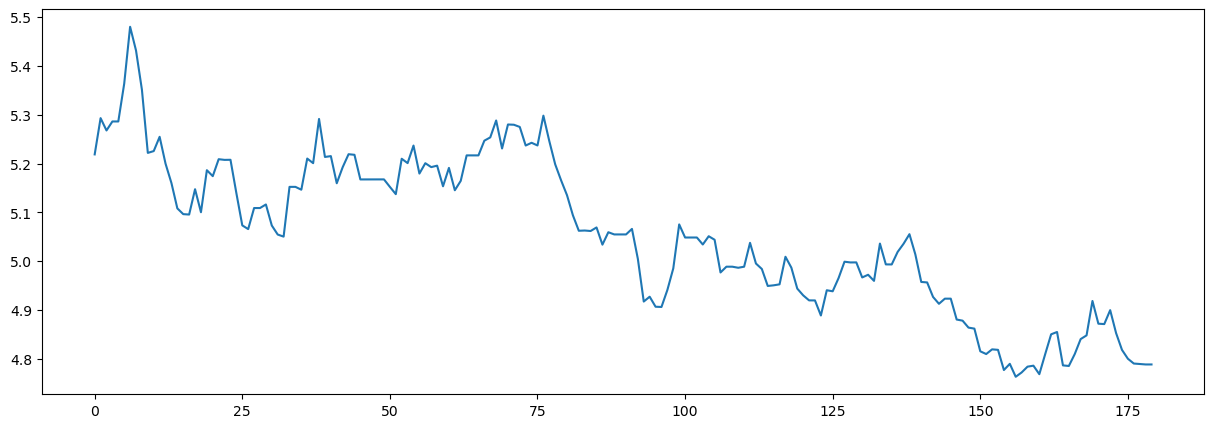

In [6]:
plt.figure(figsize = (15,5))
plt.plot(last_days_list)
plt.show()

# Python and Twilio
https://www.twilio.com/docs/libraries/python

In [ ]:
from twilio.rest import Client

account_sid = 'AC5a23fb4df8af82b8092ef97b0e34effa'
token = 'e60f36ab07adabf03a58319a26df9f9f'

client = Client(account_sid, token)

sender = '+18064194961' # twilio number
destiny = '+5521972795556'

message = client.messages.create(
    to=destiny, 
    from_=sender,
    body="Hello, SMS world!")

print(message.sid)

# Heroku API | Code running on cloud
(to add)

# CEP API
https://viacep.com.br/

## Getting an address using brazilian zip code

In [10]:
import requests

cep = "20.090-002"

cep = cep.replace("-", "").replace(".", "").replace(" ", "")

if len(cep) == 8:
    link = f'https://viacep.com.br/ws/{cep}/json/'

    requisicao = requests.get(link)

    print(requisicao)

    dic_requisicao = requisicao.json()

    uf = dic_requisicao['uf']
    cidade = dic_requisicao['localidade']
    bairro = dic_requisicao['bairro']
    print(dic_requisicao)
else:
    print("CEP Inválido")

<Response [200]>
{'cep': '20090-002', 'logradouro': 'Avenida Rio Branco', 'complemento': 'de 32 a 62 - lado par', 'bairro': 'Centro', 'localidade': 'Rio de Janeiro', 'uf': 'RJ', 'ibge': '3304557', 'gia': '', 'ddd': '21', 'siafi': '6001'}


## Getting a brazilian zip code using an address

In [11]:
uf = "RJ"
cidade = "Rio de Janeiro"
endereco = "Rio Branco"

link = f'https://viacep.com.br/ws/{uf}/{cidade}/{endereco}/json/'

requisicao = requests.get(link)
print(requisicao)

dic_requisicao = requisicao.json()
pprint.pprint(dic_requisicao[0:3]) # neat way

<Response [200]>
[{'bairro': 'Rio Comprido',
  'cep': '20251-620',
  'complemento': '',
  'ddd': '21',
  'gia': '',
  'ibge': '3304557',
  'localidade': 'Rio de Janeiro',
  'logradouro': 'Rua Lírio Branco',
  'siafi': '6001',
  'uf': 'RJ'},
 {'bairro': 'Centro',
  'cep': '20040-001',
  'complemento': 'de 102 a 126 - lado par',
  'ddd': '21',
  'gia': '',
  'ibge': '3304557',
  'localidade': 'Rio de Janeiro',
  'logradouro': 'Avenida Rio Branco',
  'siafi': '6001',
  'uf': 'RJ'},
 {'bairro': 'Centro',
  'cep': '20040-906',
  'complemento': '109',
  'ddd': '21',
  'gia': '',
  'ibge': '3304557',
  'localidade': 'Rio de Janeiro',
  'logradouro': 'Avenida Rio Branco',
  'siafi': '6001',
  'uf': 'RJ'}]


In [12]:
import pandas as pd

tabela = pd.DataFrame(dic_requisicao)
display(tabela)

,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
0,20251-620,Rua Lírio Branco,,Rio Comprido,Rio de Janeiro,RJ,3304557,,21,6001
1,20040-001,Avenida Rio Branco,de 102 a 126 - lado par,Centro,Rio de Janeiro,RJ,3304557,,21,6001
2,20040-906,Avenida Rio Branco,109,Centro,Rio de Janeiro,RJ,3304557,,21,6001
3,20040-005,Avenida Rio Branco,de 117 a 123 - lado ímpar,Centro,Rio de Janeiro,RJ,3304557,,21,6001
4,20040-909,Avenida Rio Branco,138,Centro,Rio de Janeiro,RJ,3304557,,21,6001
5,20040-009,Avenida Rio Branco,de 221 ao fim - lado ímpar,Centro,Rio de Janeiro,RJ,3304557,,21,6001
6,20090-903,Avenida Rio Branco,4,Centro,Rio de Janeiro,RJ,3304557,,21,6001
7,20090-002,Avenida Rio Branco,de 32 a 62 - lado par,Centro,Rio de Janeiro,RJ,3304557,,21,6001
8,20040-902,Avenida Rio Branco,185,Centro,Rio de Janeiro,RJ,3304557,,21,6001
9,20090-908,Avenida Rio Branco,45,Centro,Rio de Janeiro,RJ,3304557,,21,6001


# Stock market value API
https://www.alphavantage.co/documentation/

## Weekly stock market values

### json format

In [20]:
# from chave import api_key
api_key = 'xxxxxxxxxxxxxxxxx'
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=ITUB4.SAO&apikey={api_key}'
r = requests.get(url)
data = r.json()

pprint.pprint(data)

{'Meta Data': {'1. Information': 'Weekly Adjusted Prices and Volumes',
               '2. Symbol': 'ITUB4.SAO',
               '3. Last Refreshed': '2023-07-17',
               '4. Time Zone': 'US/Eastern'},
 'Weekly Adjusted Time Series': {'2005-01-14': {'1. open': '325.3358',
                                                '2. high': '332.0096',
                                                '3. low': '320.3228',
                                                '4. close': '332.0096',
                                                '5. adjusted close': '2.1719',
                                                '6. volume': '47125671',
                                                '7. dividend amount': '0.0000'},
                                 '2005-01-21': {'1. open': '331.9178',
                                                '2. high': '336.1632',
                                                '3. low': '322.0748',
                                                '4. close': '32

### csv format

In [21]:
import pandas as pd
from io import StringIO # from text to file

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=ITUB4.SAO&apikey={api_key}&datatype=csv'
r = requests.get(url)

tabela = pd.read_csv(StringIO(r.text))
display(tabela)

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2023-07-17,28.2300,28.8300,28.1600,28.8300,28.8300,15887500,0.0000
1,2023-07-14,29.3700,29.3700,28.1000,28.2800,28.2800,106228800,0.0000
2,2023-07-07,28.5400,29.4600,28.3600,29.1400,29.1400,99545900,0.0000
3,2023-06-30,28.6300,28.9400,27.9800,28.4200,28.4024,147790900,0.0176
4,2023-06-23,28.5800,29.1700,28.3600,28.6700,28.6522,107469697,0.2663
...,...,...,...,...,...,...,...,...
970,2005-02-11,358.6949,365.3682,356.1920,361.1142,2.3633,31870072,0.0000
971,2005-02-04,320.7401,367.0364,320.7401,365.3682,2.3911,45839273,0.0024
972,2005-01-28,322.8255,326.9963,313.2326,316.1517,2.0681,43218160,0.0000
973,2005-01-21,331.9178,336.1632,322.0748,324.9108,2.1254,42366601,0.0000


### Brazilian stock market

In [22]:
acoes = ['ITUB4', 'ABEV3', 'BBAS3']

compilada = pd.DataFrame()

for acao in acoes:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={acao}.SAO&apikey={api_key}&datatype=csv'
    r = requests.get(url)
    tabela = pd.read_csv(StringIO(r.text))
    lista_tabelas = [compilada, tabela]
    compilada = pd.concat(lista_tabelas)
    
display(compilada)

,symbol,open,high,low,price,volume,latestDay,previousClose,change,changePercent
0,ITUB4.SAO,28.23,28.83,28.16,28.83,15887500,2023-07-17,28.28,0.55,1.9448%
0,ABEV3.SAO,14.72,14.83,14.63,14.82,20971500,2023-07-17,14.74,0.08,0.5427%
0,BBAS3.SAO,47.80,48.19,47.46,48.11,5354900,2023-07-17,47.69,0.42,0.8807%


In [23]:
url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=amazon&apikey={api_key}&datatype=csv'
r = requests.get(url)

tabela = pd.read_csv(StringIO(r.text))
display(tabela)

,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,AMZN,Amazon.com Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8000
1,AMZ.DEX,Amazon.com Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.6000
2,AMZ.FRK,Amazon.com Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6000
3,AMZO34.SAO,Amazon.com Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6000
4,0R1O.LON,Amazon.com Inc.,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.5714
5,AMZ1.FRK,AMAZON.COM INC.CDR DL-01,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.5000
6,AZFL,Amazonas Florestal Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.4286


In [ ]:
url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=AMZN&apikey={api_key}'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
import pprint

resultado = pd.DataFrame(data['annualEarnings'])
display(resultado)